### Imports

In [1]:
from mlp import train, Dense, predict_with_layer_value
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, plot_bitmap_matrix_with_noise, get_config_params, add_noise_to_dataset
from data.font import fontDict
import numpy as np
import matplotlib.pyplot as plt

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation, hidden_layers, latent_space = get_config_params('./denoising_ae.json')

mse_list = []

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
dataset = np.reshape(bitmapList,(len(bitmapList), 35, 1))
noisy_dataset = add_noise_to_dataset(dataset, 0.1)

### 35x20x10x2x10x20x35

In [4]:
# El espacio latente es la salida de la "capa 6"
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]
error = train(autoencoder, mse, mse_derivative, dataset, dataset, epochs=max_epochs, verbose=False)

mse_list.append(error)

### Original vs Noisy vs Predicted

In [5]:
def plot_bitmap_matrix_2(matrix_list, character_list, title):
    num_plots = len(matrix_list)
    num_rows = int(np.sqrt(num_plots))
    num_cols = int(np.ceil(num_plots / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            if index < num_plots:
                axes[i, j].imshow(matrix_list[index], cmap='binary', interpolation='none', vmin=0, vmax=1)
                axes[i, j].set_title(character_list[index])
                axes[i, j].set_xticks([])
                axes[i, j].set_yticks([])
            else:
                fig.delaxes(axes[i, j])  # Elimina los ejes si no hay más plots

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [6]:
def plot_bitmap_matrix(original, predicted, character):
    # Crear un heatmap con imshow de matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(3, 2)) # 1 fila, 2 columnas

    # Crear heatmaps para cada par de matrices
    axs[0].imshow(original, cmap='binary', interpolation='none', vmin=0, vmax=1)
    axs[1].imshow(predicted, cmap='binary', interpolation='none', vmin=0, vmax=1)

    axs[0].set_title('Original ' + character)
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].set_title('Predicted ' + character)
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    plt.show()

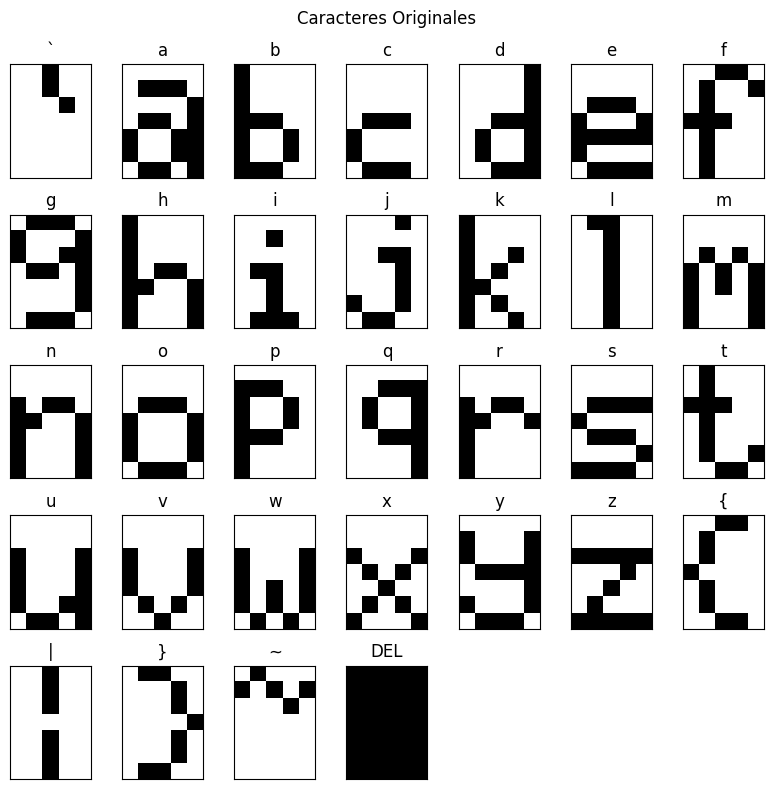

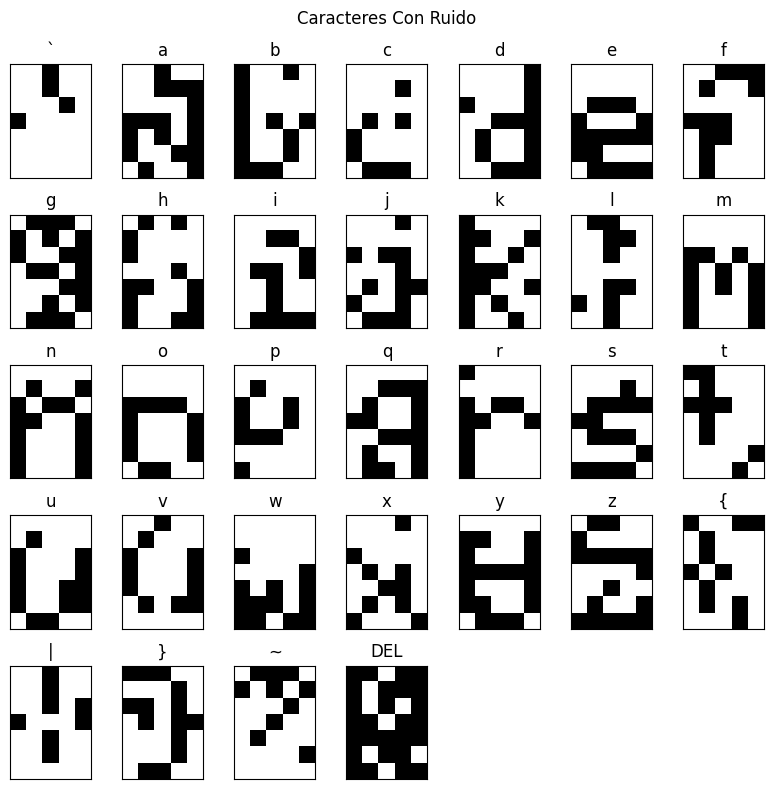

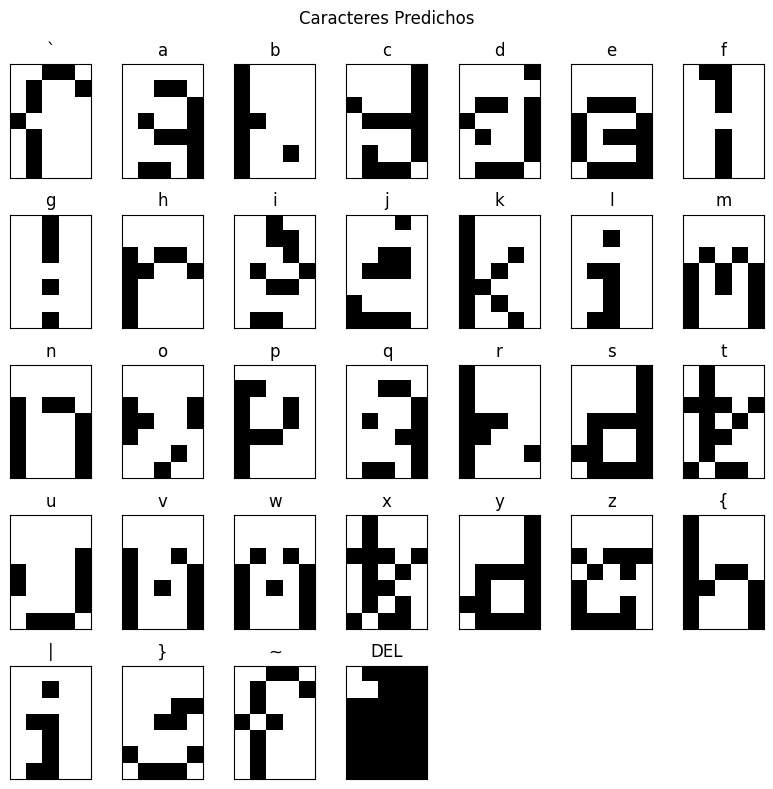

In [10]:
characters = list(bitmapDict.keys())

latent_spaces = []
input_matrix_list = []
output_matrix_list = []
noisy_matrix_list = []

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    #input_bitmap_matrix = bitmap_as_matrix(input_bitmap)
    input_matrix_list.append(bitmap_as_matrix(input_bitmap))

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset[c][i][0])
    #noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 
    noisy_matrix_list.append(bitmap_as_matrix(noisy_bitmap))   


    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset[c], 6)


    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    # output_bitmap_matrix = bitmap_as_matrix(output_bitmap)
    output_matrix_list.append(bitmap_as_matrix(output_bitmap))

    # Marcamos en gris los pixeles que cambiaron
    # for i in range(len(output_bitmap_matrix)):
    #    for j in range(len(output_bitmap_matrix[i])):
    #        if output_bitmap_matrix[i][j] != noisy_bitmap_matrix[i][j]:
    #            output_bitmap_matrix[i][j] = 0.3
    
    #plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])

plot_bitmap_matrix_2(input_matrix_list, characters, "Caracteres Originales")
plot_bitmap_matrix_2(noisy_matrix_list, characters, "Caracteres Con Ruido")
plot_bitmap_matrix_2(output_matrix_list, characters, "Caracteres Predichos")

/workspaces/TPs-SIA/Tp5/utils.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 3, figsize=(3, 2)) # 1 fila, 2 columnas


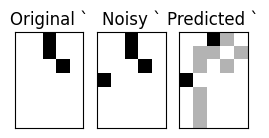

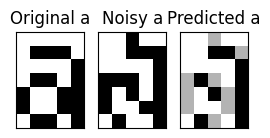

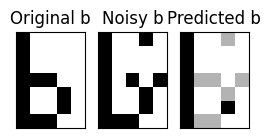

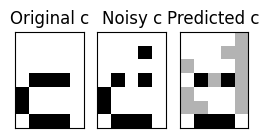

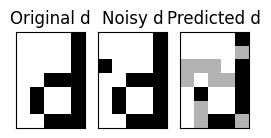

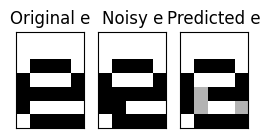

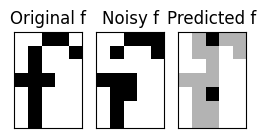

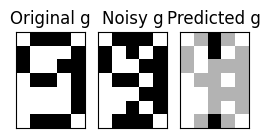

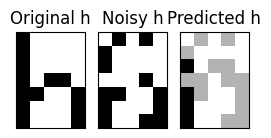

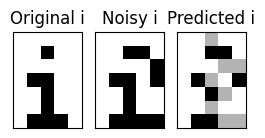

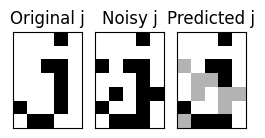

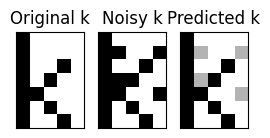

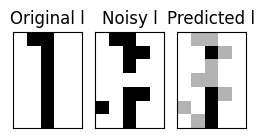

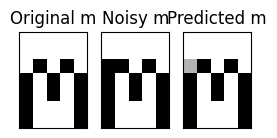

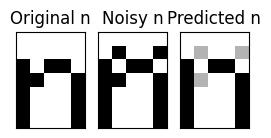

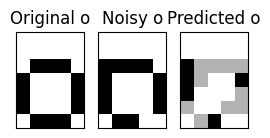

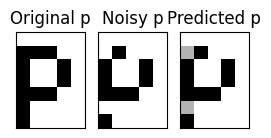

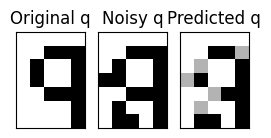

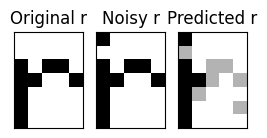

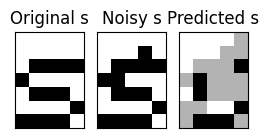

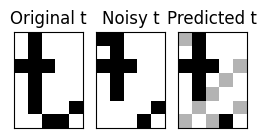

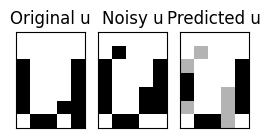

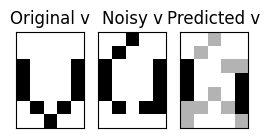

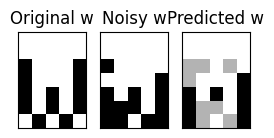

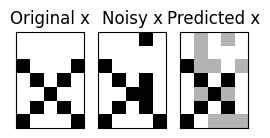

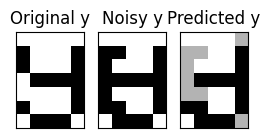

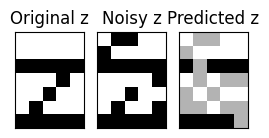

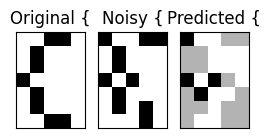

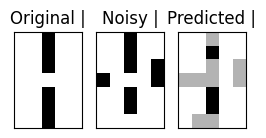

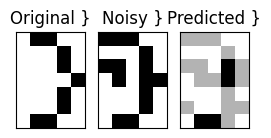

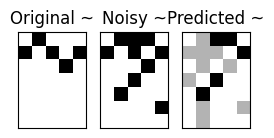

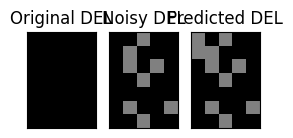

In [11]:
characters = list(bitmapDict.keys())

for c in range(len(characters)):
    input_bitmap = []
    noisy_bitmap = []
    output_bitmap = []

    # dataset es una lista de listas de -listas con un solo elemento-
    for i in range(len(dataset[c])):
        input_bitmap.append(dataset[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    for i in range(len(noisy_dataset[c])):
        noisy_bitmap.append(noisy_dataset[c][i][0])
    noisy_bitmap_matrix = bitmap_as_matrix(noisy_bitmap) 

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, noisy_dataset[c], 6)


    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    for i in range(len(output_bitmap_matrix)):
        for j in range(len(output_bitmap_matrix[i])):
            if output_bitmap_matrix[i][j] != noisy_bitmap_matrix[i][j]:
                output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix_with_noise(input_bitmap_matrix, noisy_bitmap_matrix, output_bitmap_matrix, characters[c])